In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



In [5]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Datasets/AirQualityUCI.xlsx')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [7]:
df.shape

(9357, 15)

In [8]:
df.eq(-200).sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [10]:
# df.style.applymap(lambda x: 'background-color : yellow' if x==-200 else '')

The dataset has no NAN values. Missing values are tagged with -200 value..

In [11]:
# # search for -200 value in the dataframe
# df[df.eq(-200).any(1)]

In [12]:
df.replace(-200, np.nan, inplace=True)

In [13]:
df.eq(-200).sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [14]:
df.isna().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [15]:
# more than 90% of values are missing
df.drop('NMHC(GT)', axis=1, inplace=True)

In [16]:
df['DateTime'] = df['Date'].astype('str') + ' ' + df['Time'].astype('str')

In [17]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [19]:
# df.drop(['Date', 'Time'], axis=1, inplace=True)
df.set_index('DateTime', inplace=True)

In [20]:
df.head(2)

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
DateTime,,,,,,,,,,,,,,
2004-03-10 18:00:00,2004-03-10,18:00:00,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.6,48.875001,0.757754
2004-03-10 19:00:00,2004-03-10,19:00:00,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.3,47.700000,0.725487


In [21]:
print(df.index.inferred_freq)

H


# Exploratory Data Analysis

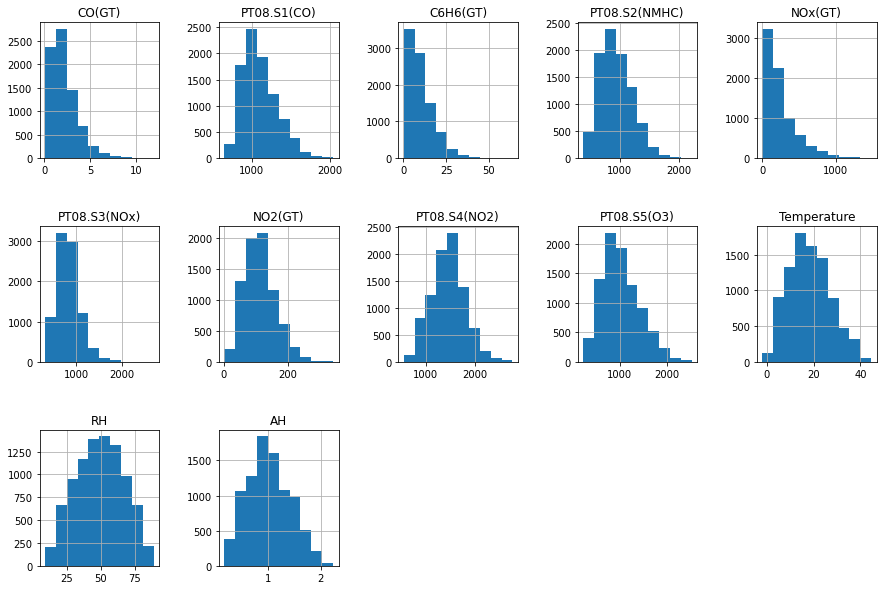

In [27]:
fig, axs = plt.subplots(3, 5, figsize=(15,10))
ax0 = df['CO(GT)'].hist(ax=axs[0, 0])
ax0.title.set_text('CO(GT)')

ax1 = df['PT08.S1(CO)'].hist(ax=axs[0,1])
ax1.title.set_text('PT08.S1(CO)')

ax3 = df['C6H6(GT)'].hist(ax=axs[0,2])
ax3.title.set_text('C6H6(GT)')

ax4 = df['PT08.S2(NMHC)'].hist(ax=axs[0, 3])
ax4.title.set_text('PT08.S2(NMHC)')

ax5 = df['NOx(GT)'].hist(ax=axs[0, 4])
ax5.title.set_text('NOx(GT)')

ax6 = df['PT08.S3(NOx)'].hist(ax=axs[1,0])
ax6.title.set_text('PT08.S3(NOx)')

ax7 = df['NO2(GT)'].hist(ax=axs[1, 1])
ax7.title.set_text('NO2(GT)')

ax8 = df['PT08.S4(NO2)'].hist(ax=axs[1,2])
ax8.title.set_text('PT08.S4(NO2)')

ax9 = df['PT08.S5(O3)'].hist(ax=axs[1, 3])
ax9.title.set_text('PT08.S5(O3)')

ax10 = df['T'].hist(ax=axs[1, 4])
ax10.title.set_text('Temperature')

ax11 = df['RH'].hist(ax=axs[2, 0])
ax11.title.set_text('RH')

ax12 = df['AH'].hist(ax=axs[2, 1])
ax12.title.set_text('AH')

fig.delaxes(axs[2, 2])
fig.delaxes(axs[2, 3])
fig.delaxes(axs[2, 4])
plt.subplots_adjust(wspace=0.5, hspace=0.5)

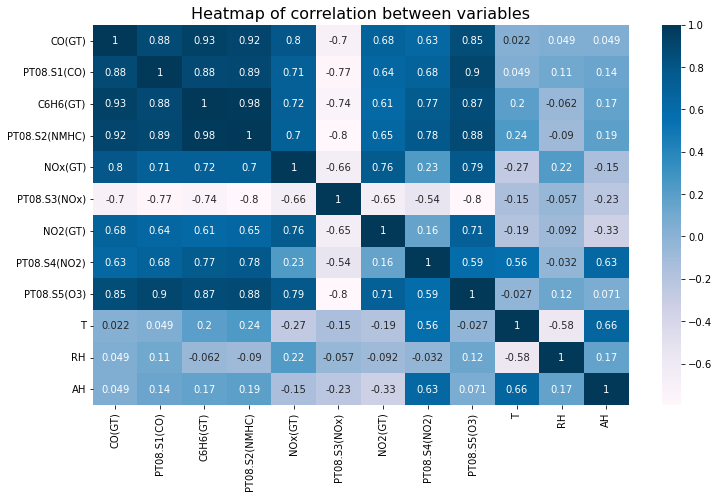

In [28]:
# corr = df.corr()
# corr.style.background_gradient(cmap='coolwarm')
plt.figure(figsize = (12,7))
ax = sns.heatmap(df.corr(), annot=True, cmap='PuBu')
plt.title('Heatmap of correlation between variables', fontsize=16)
plt.show()

In [29]:
# since temperature has high correlation with only 4 features, we'll be using only those for now
df = df.drop(['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S5(O3)'], axis=1)

## Outliers Handling

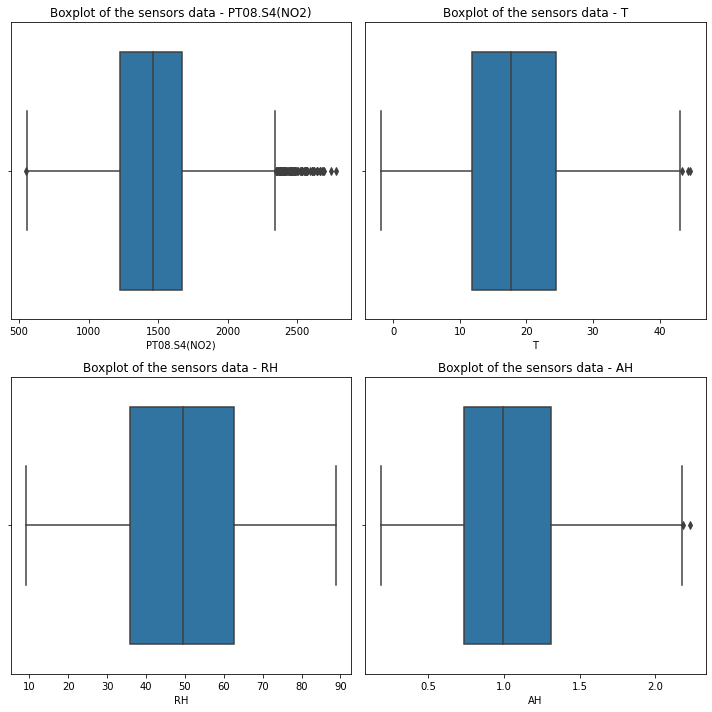

In [47]:
plt.figure(figsize = (10, 10))
plotnumber = 1

for col in df.columns[2:]:
    if plotnumber <= (len(df.columns)-1):
        ax = plt.subplot(2, 2, plotnumber)
        sns.boxplot(df[col]) 
        plt.title('Boxplot of the sensors data - {}'.format(col))

        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [48]:
for col in df.columns[2:]:
  print('Skewness value of {}:'.format(col), df[col].skew())

Skewness value of PT08.S4(NO2): 0.2053621609495907
Skewness value of T: 0.3093018343620682
Skewness value of RH: -0.03797420537078077
Skewness value of AH: 0.2513875409980141


### Replacing outliers by flooring and capping

In [55]:
for col in df.columns[2:]:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  upper_limit = Q3 + 1.5 * IQR
  lower_limit = Q1 - 1.5 * IQR
  df[col] = np.where(df[col]>upper_limit, upper_limit, np.where(df[col]<lower_limit, lower_limit, df[col]))


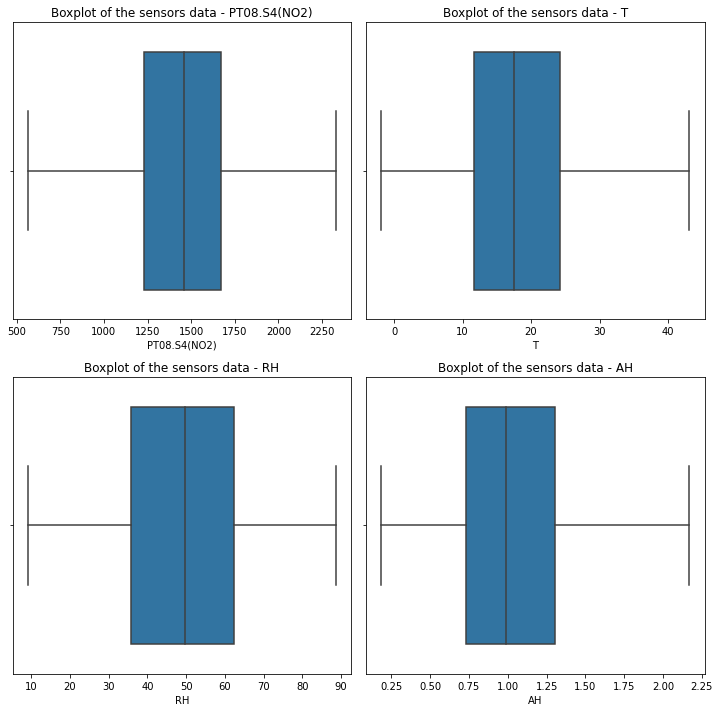

In [56]:
plt.figure(figsize = (10, 10))
plotnumber = 1

for col in df.columns[2:]:
    if plotnumber <= (len(df.columns)-1):
        ax = plt.subplot(2, 2, plotnumber)
        sns.boxplot(df[col]) 
        plt.title('Boxplot of the sensors data - {}'.format(col))

        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [51]:
# replacing missing values using linear interpolation
for col in df.columns[2:15]:
  df[col] = df[col].interpolate()

### Check the trend of temperature over hour of the day, week day, month and different seasons

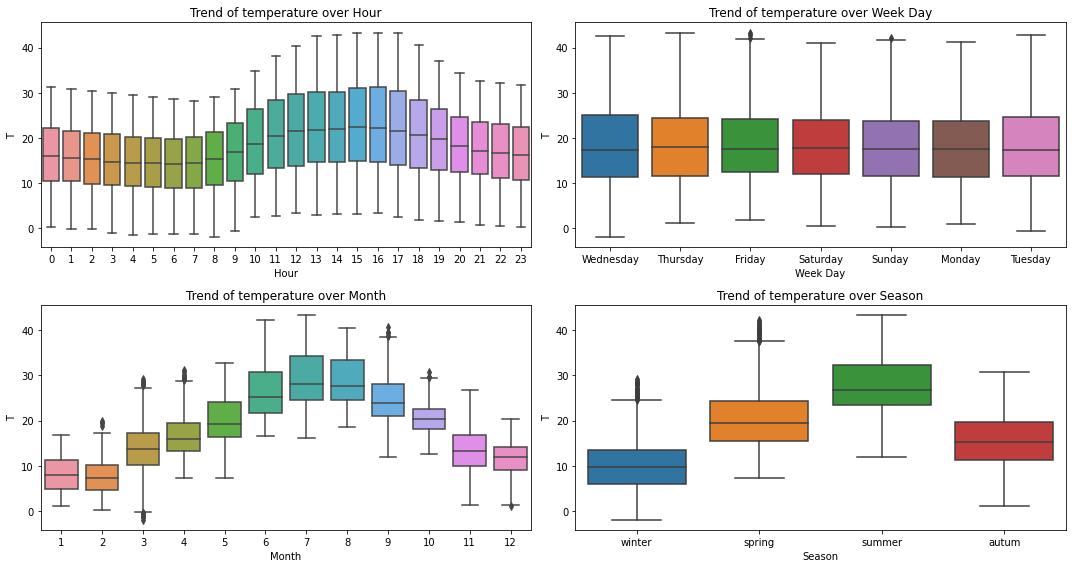

In [ ]:
# Create a boxplot of column Temperature T by hour of the day, day of the week, month and season
df['Hour'] = df.index.hour
df['Week Day'] = df.index.day_name()
df['Month'] = df.index.month

# Extract season from pandas date
def season(date):
  year = str(date.year)
  seasons = {'spring': pd.date_range(start='28-03-'+year, end = '27-06-'+year),
             'summer': pd.date_range(start='28-06-'+year, end='29-09-'+year),
             'autum': pd.date_range(start='30-09-'+year, end='28-12-'+year)
             }
  if date in seasons['spring']:
    return 'spring'
  if date in seasons['summer']:
    return 'summer'
  if date in seasons['autum']:
    return 'autum'
  else:
    return 'winter'

df['Season'] = df['Date'].map(season)

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15, 8))
index = 0
axs = axs.flatten()
for col, val in df.items():
  if col in ['Hour', 'Week Day', 'Month', 'Season']:
    sns.boxplot(y='T', x=col, data=df, ax=axs[index]).set_title('Trend of temperature over {}'.format(col))
    index += 1
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

## Mathematical Transformation

In [52]:
from scipy.stats import probplot, yeojohnson

In [85]:
# plot the histograms to have a quick look at the variable distribution
# histogram and Q-Q plots

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15, 7))
    plt.subplot(1, 4, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 4, 2)
    probplot(df[variable], dist="norm", plot=plt)

    plt.subplot(1, 4, 3)
    sns.boxplot(df[variable])

    plt.subplot(1, 4, 4)
    sns.kdeplot(df[variable])

    plt.show()

In [57]:
df.columns

Index(['Date', 'Time', 'PT08.S4(NO2)', 'T', 'RH', 'AH'], dtype='object')

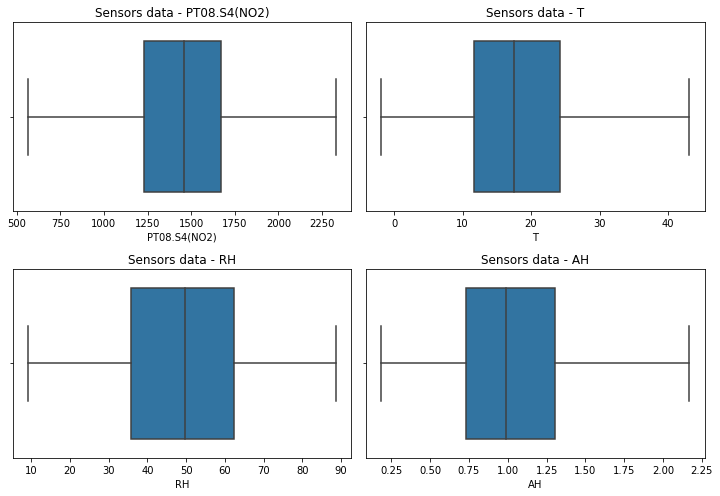

In [83]:
# visualize the data distribution across all columns of the dataframe
plt.figure(figsize = (10, 7))
plotnumber = 1

for col in df.columns[2:]:
    if plotnumber <= (len(df.columns)-1):
        ax = plt.subplot(2, 2, plotnumber)
        sns.boxplot(df[col]) 
        plt.title('Sensors data - {}'.format(col))

        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [92]:
# df.drop(['PT08.S4(NO2)_yeo', 'T_yeo', 'RH_yeo', 'AH_yeo'], inplace=True, axis=1)

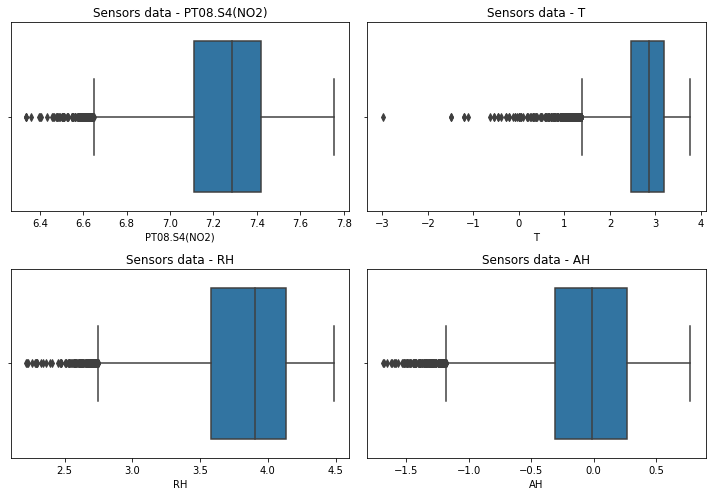

In [79]:
# distribution after log transformation
plt.figure(figsize = (10, 7))
plotnumber = 1

for col in df.columns[2:]:
    if plotnumber <= (len(df.columns)-1):
        ax = plt.subplot(2, 2, plotnumber)
        sns.boxplot(np.log(df[col])) 
        plt.title('Sensors data - {}'.format(col))

        
    plotnumber += 1

plt.tight_layout()
plt.show()

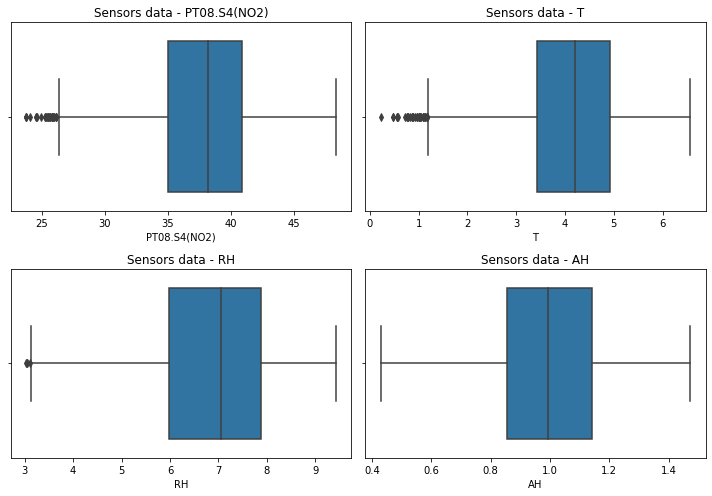

In [80]:
# distribution after square root transformation
plt.figure(figsize = (10, 7))
plotnumber = 1

for col in df.columns[2:]:
    if plotnumber <= (len(df.columns)-1):
        ax = plt.subplot(2, 2, plotnumber)
        sns.boxplot(np.sqrt(df[col])) 
        plt.title('Sensors data - {}'.format(col))

        
    plotnumber += 1

plt.tight_layout()
plt.show()

Optimal λ:  0.7981677184292094


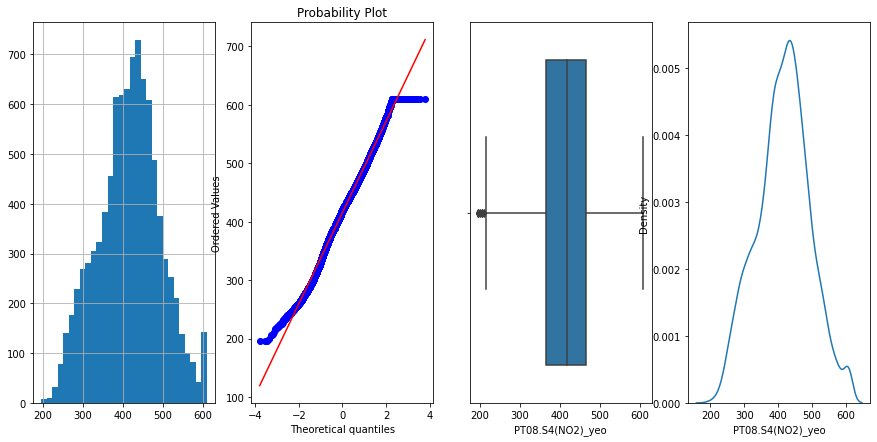

In [93]:
# Yeo-Johnson Transformation
df['PT08.S4(NO2)_yeo'], param = yeojohnson(df['PT08.S4(NO2)']) 
print('Optimal λ: ', param)
diagnostic_plots(df, 'PT08.S4(NO2)_yeo')

Optimal λ:  0.6586682591176305


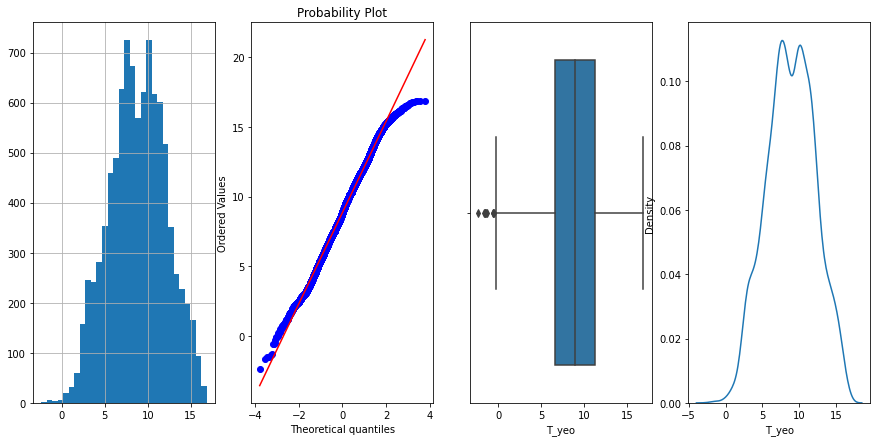

In [94]:
df['T_yeo'], param = yeojohnson(df['T']) 
print('Optimal λ: ', param)
diagnostic_plots(df, 'T_yeo')

Optimal λ:  0.9137259236885544


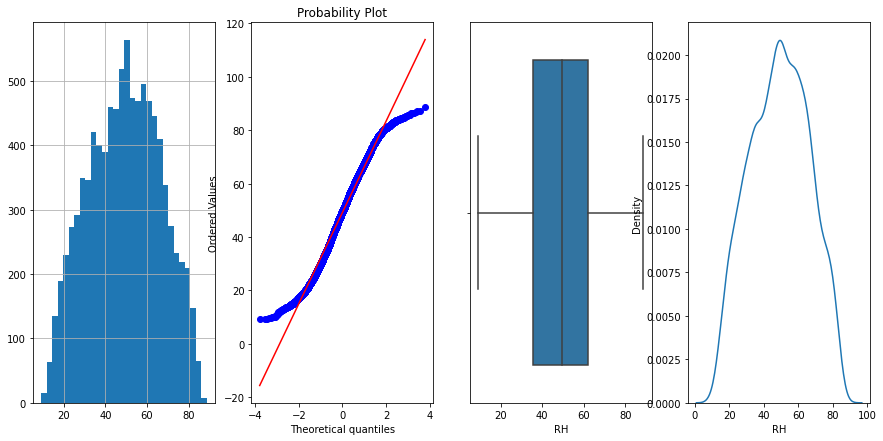

In [95]:
df['RH_yeo'], param = yeojohnson(df['RH']) 
print('Optimal λ: ', param)
diagnostic_plots(df, 'RH')

Optimal λ:  0.32874456846188915


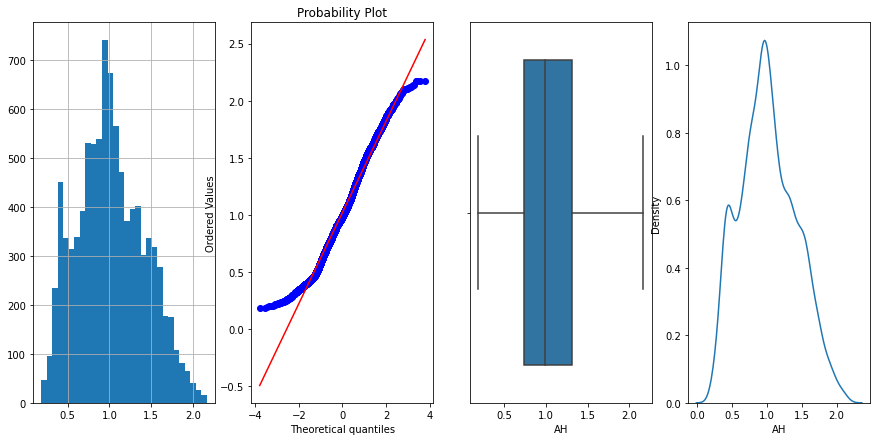

In [96]:
df['AH_yeo'], param = yeojohnson(df['AH']) 
print('Optimal λ: ', param)
diagnostic_plots(df, 'AH')

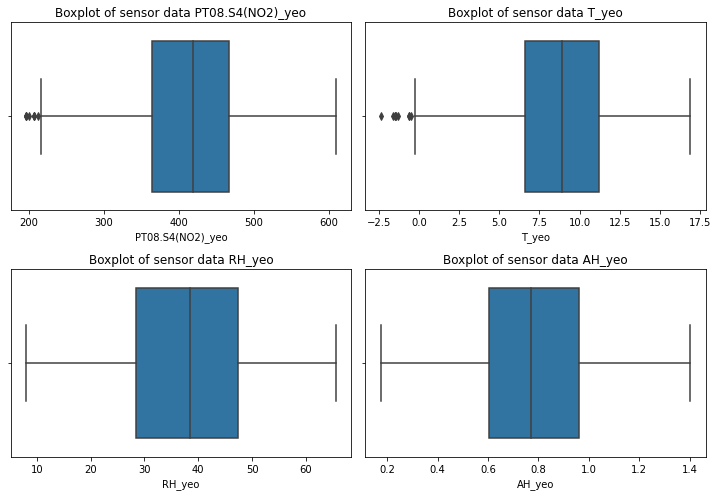

In [103]:
# after yeo-johnson transformation
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10, 7))
index = 0
axs = axs.flatten()
for col, val in df[['PT08.S4(NO2)_yeo','T_yeo', 'RH_yeo', 'AH_yeo']].items():
  sns.boxplot(df[col], ax=axs[index]).set_title('Boxplot of sensor data {}'.format(col))
  index += 1
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

<b> More outliers are introduced after transformation, so it is not necessary.</b>

In [104]:
df.drop(['PT08.S4(NO2)_yeo', 'T_yeo', 'RH_yeo', 'AH_yeo'], inplace=True, axis=1)

## Time Resampling
## Upsampling

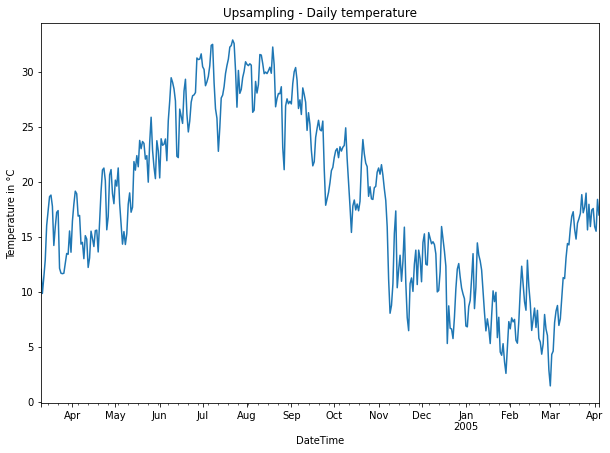

In [105]:
# daily temperature
daily_temp = df['T'].resample('D').mean()
daily_temp.plot(figsize=(10,7))
plt.title('Upsampling - Daily temperature')
plt.xlabel('DateTime')
plt.ylabel('Temperature in °C');


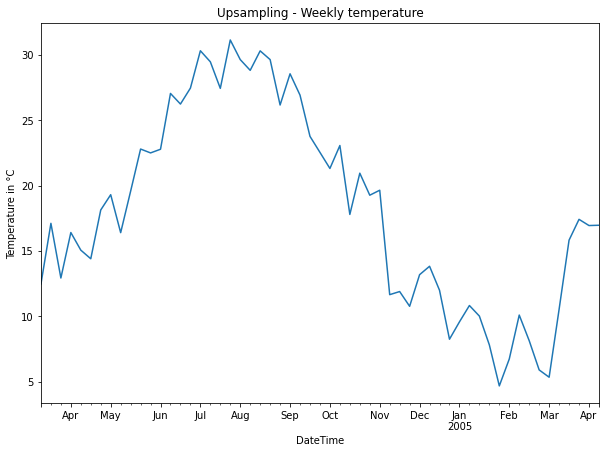

In [106]:
# weekly temperature
weekly_temp = df['T'].resample('W').mean()
weekly_temp.plot(figsize=(10,7))
plt.title('Upsampling - Weekly temperature')
plt.xlabel('DateTime')
plt.ylabel('Temperature in °C');

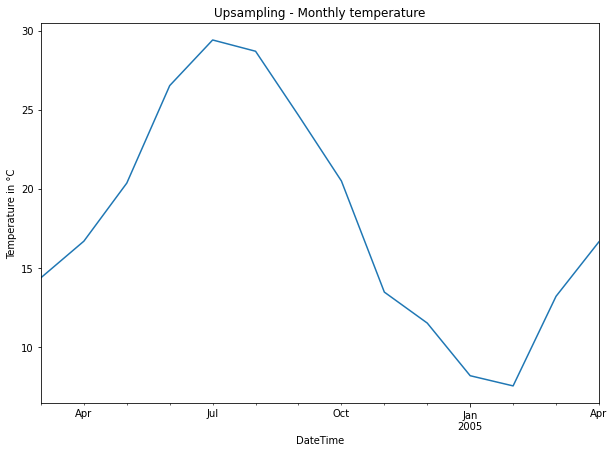

In [107]:
# monthly temperature
monthly_temp = df['T'].resample('M').mean()
monthly_temp.plot(figsize=(10,7))
plt.title('Upsampling - Monthly temperature')
plt.xlabel('DateTime')
plt.ylabel('Temperature in °C');

In [108]:
def run_sequence_plot(x, y, title, xlabel='time', ylabel='series'):
    plt.figure(figsize=(10,7))
    plt.plot(x, y, 'k-')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.xticks(rotation=45, rotation_mode='anchor', ha='right')
    plt.ylabel(ylabel)
    plt.grid(alpha=0.3);

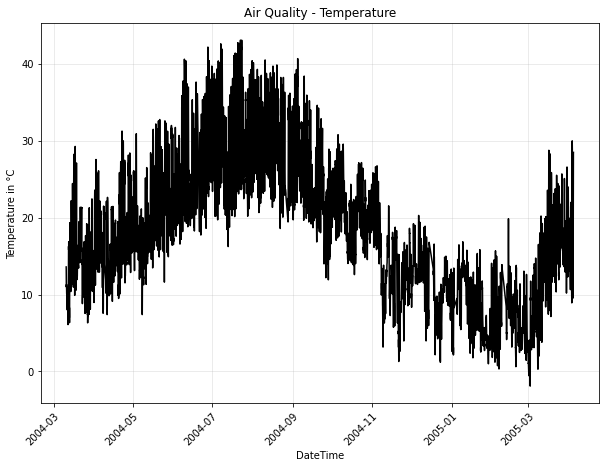

In [109]:
run_sequence_plot(df.index, df['T'], title='Air Quality - Temperature', xlabel='DateTime', ylabel='Temperature in °C')

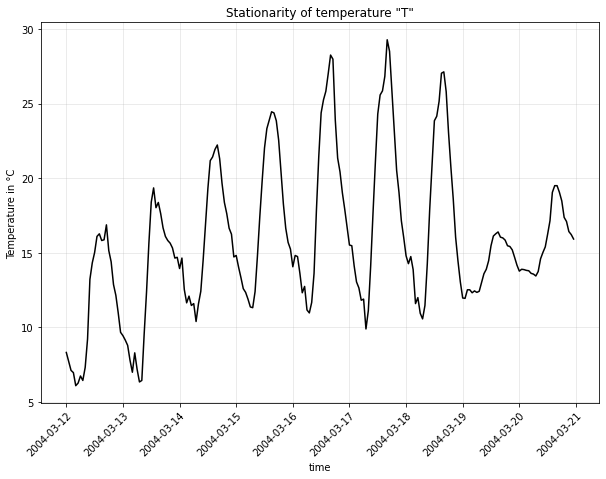

In [110]:
run_sequence_plot(df.loc['2004-03-12 00:00:00':'2004-03-20 23:00:00'].index, 
                  df['T'].loc['2004-03-12 00:00:00':'2004-03-20 23:00:00'], 
                  title='Stationarity of temperature "T"',  ylabel='Temperature in °C')

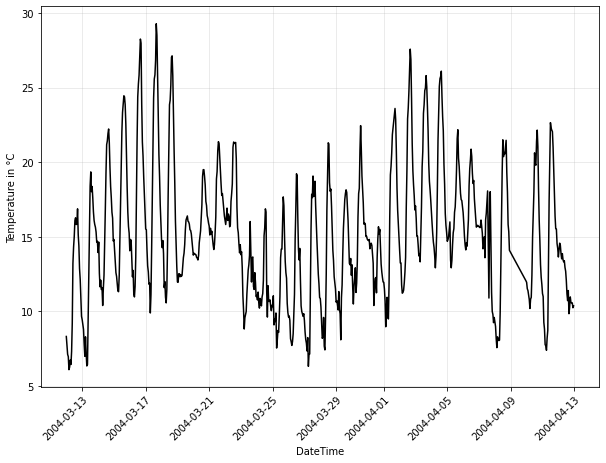

In [ ]:
run_sequence_plot(df.loc['2004-03-12 00:00:00':'2004-04-12 23:00:00'].index, 
                  df['T'].loc['2004-03-12 00:00:00':'2004-04-12 23:00:00'], 
                  title=None,  xlabel='DateTime', ylabel='Temperature in °C')

<b> Found cyclic pattern in the series.</b>

We can also carry out some statistical tests to check if the data is stationary or not.

## Stationarity check

### Augmented Dicky Fuller (ADF) Test

In [111]:
from statsmodels.tsa.stattools import adfuller

adf, pvalue, usedlags, nobs, critical_value, icbest = adfuller(df['T'])

In [112]:
def adf_test(timeseries):
    test_stat = adfuller(timeseries)
    result = pd.Series({'ADF statistic': test_stat[0],
                       'p-value': test_stat[1],
                        'Used lags': test_stat[2],
                        'Observations used': test_stat[3]})
    for key, value in test_stat[4].items():
        result['Critical value ({})'.format(key)] = value
    if test_stat[1] < 0.05:
        print("\nReject null hypothesis! Indicates that the data is stationary.")
    else:
        print("\nAccept null hypothesis! Indicates that the data is not stationary.")
    return result

In [113]:
adf_test(df['T'])


Reject null hypothesis! Indicates that the data is stationary.


ADF statistic             -3.089845
p-value                    0.027314
Used lags                 29.000000
Observations used       9327.000000
Critical value (1%)       -3.431051
Critical value (5%)       -2.861850
Critical value (10%)      -2.566935
dtype: float64

### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test

In [115]:
# warnings.filterwarnings('ignore')

In [116]:
from statsmodels.tsa.stattools import kpss

kpss_stat, p_value, lags, crit = kpss(df['T'])

In [117]:
def kpss_test(timeseries):
    test_stat = kpss(timeseries)
    result = pd.Series({'KPSS statistic': test_stat[0],
                       'p-value': test_stat[1],
                        'Used lags': test_stat[2]})
    for key, value in test_stat[3].items():
        result['Critical value ({})'.format(key)] = value
    if test_stat[1] < 0.05:
        print("\nReject null hypothesis! Indicates that the data is not stationary.")
    else:
        print("\nAccept null hypothesis! Indicates that the data is stationary.")
    return result

In [118]:
kpss_test(df['T'])


Reject null hypothesis! Indicates that the data is not stationary.


KPSS statistic           10.607016
p-value                   0.010000
Used lags                38.000000
Critical value (10%)      0.347000
Critical value (5%)       0.463000
Critical value (2.5%)     0.574000
Critical value (1%)       0.739000
dtype: float64

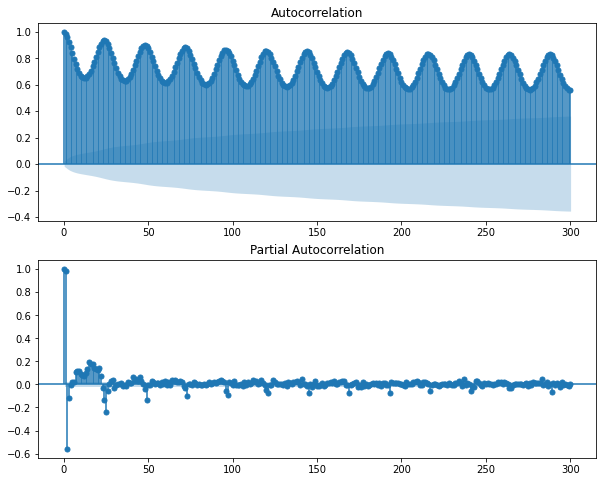

In [119]:
# Visualize ACF and PACF to identify model parameters
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(df['T'], ax=ax1, lags=300)
plot_pacf(df['T'], ax=ax2, lags=300)
plt.show()

In [120]:
df['Temperture 1st order differencing'] = df['T'] - df['T'].shift(1)

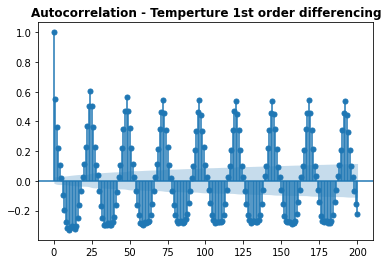

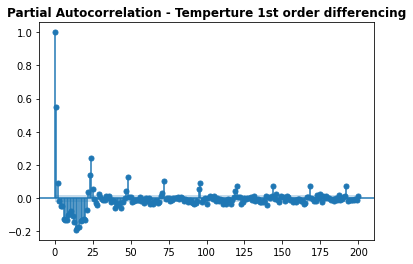

In [123]:
plot_acf(df['Temperture 1st order differencing'].dropna(), lags=200);
plt.title('Autocorrelation - Temperture 1st order differencing', fontweight="bold")
plot_pacf(df['Temperture 1st order differencing'].dropna(), lags=200)
plt.title('Partial Autocorrelation - Temperture 1st order differencing', fontweight="bold");

In [124]:
df['Temp 2nd order seasonal diff'] = df['T'].diff(periods=2)

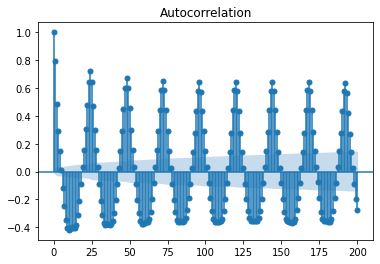

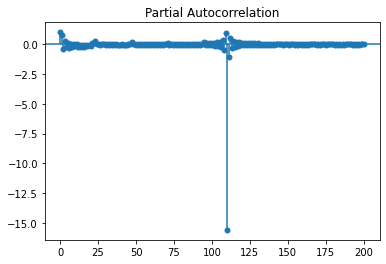

In [125]:
plot_acf(df['Temp 2nd order seasonal diff'].dropna(), lags=200);
plot_pacf(df['Temp 2nd order seasonal diff'].dropna(), lags=200);

In [126]:
df['Temp 3rd order seasonal diff'] = df['T'].diff(periods=3)

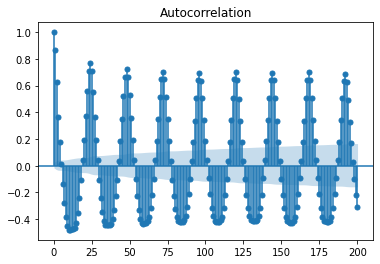

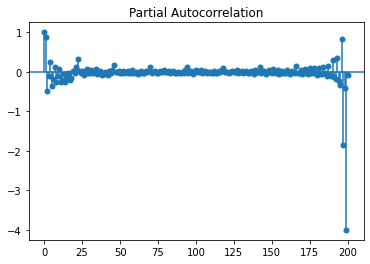

In [128]:
plot_acf(df['Temp 3rd order seasonal diff'].dropna(), lags=200);
plot_pacf(df['Temp 3rd order seasonal diff'].dropna(), lags=200);

In [129]:
df['Temp 4th order seasonal diff'] = df['T'].diff(periods=4)

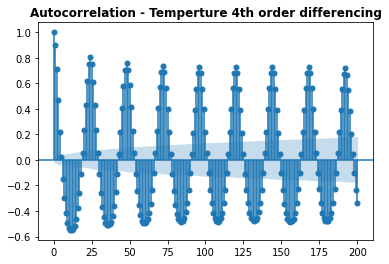

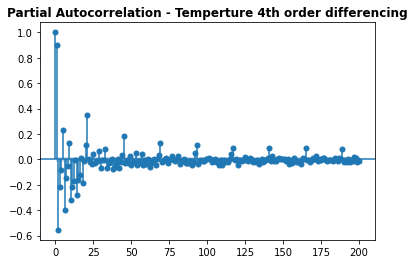

In [131]:
plot_acf(df['Temp 4th order seasonal diff'].dropna(), lags=200);
plt.title('Autocorrelation - Temperture 4th order differencing', fontweight="bold")
plot_pacf(df['Temp 4th order seasonal diff'].dropna(), lags=200)
plt.title('Partial Autocorrelation - Temperture 4th order differencing', fontweight="bold");

In [132]:
df['Temperature 12th order seasonal difference'] = df['T'].diff(12)

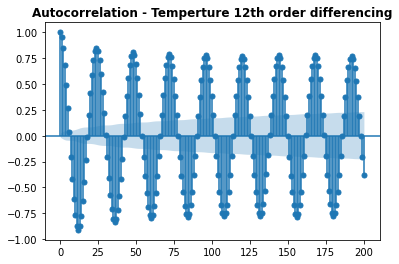

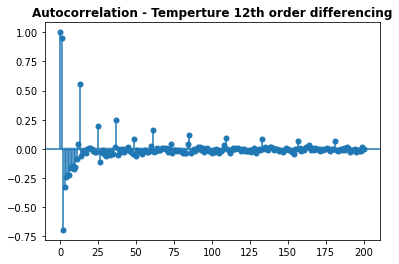

In [133]:
plot_acf(df['Temperature 12th order seasonal difference'].dropna(), lags=200);
plt.title('Autocorrelation - Temperture 12th order differencing', fontweight="bold")
plot_pacf(df['Temperature 12th order seasonal difference'].dropna(), lags=200)
plt.title('Autocorrelation - Temperture 12th order differencing', fontweight="bold");

In [134]:
df['Temperature 24th order seasonal difference'] = df['T'].diff(24)

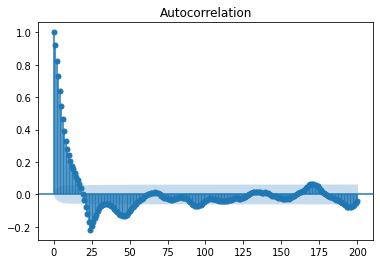

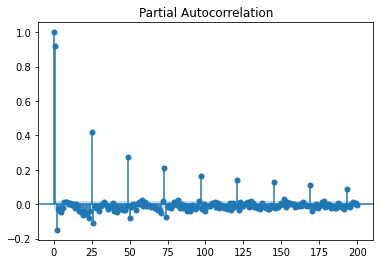

In [137]:
plot_acf(df['Temperature 24th order seasonal difference'].dropna(), lags=200);
plot_pacf(df['Temperature 24th order seasonal difference'].dropna(), lags=200);

<b> Observing the above ACF and PACF plots strong multiple seasonality is found in the series.</b>

## Time Series Decomposition

In [139]:
from statsmodels.tsa.seasonal import seasonal_decompose

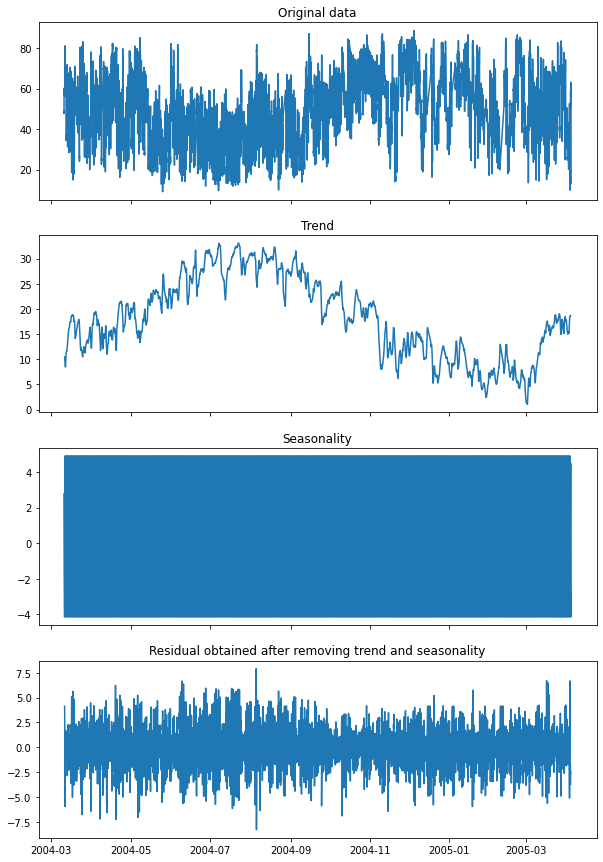

In [142]:
decomposition_result = seasonal_decompose(x=df['T'].dropna(), model='additive')
fig, ax = plt.subplots(4,1, sharex=True)
fig.set_figheight(15)
fig.set_figwidth(10)

ax[0].plot(df['RH'])
ax[0].title.set_text('Original data')

ax[1].plot(decomposition_result.trend)
ax[1].title.set_text('Trend')

ax[2].plot(decomposition_result.seasonal)
ax[2].title.set_text('Seasonality')

ax[3].plot(decomposition_result.resid)
ax[3].title.set_text('Residual obtained after removing trend and seasonality')

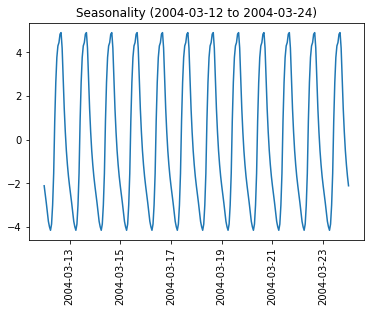

In [143]:
plt.plot(decomposition_result.seasonal['2004-03-12 00:00:00':'2004-03-24 00:00:00'])
plt.title('Seasonality (2004-03-12 to 2004-03-24)')
plt.xticks(rotation=90);

In [ ]:
def lagplot(x, y=None, lag=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(lag)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax

def plot_lags(x, y=None, lags=6, nrows=1, lagplot_kwargs={}, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, y, lag=k + 1, ax=ax, **lagplot_kwargs)
            ax.set_title(f"Lag {k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig

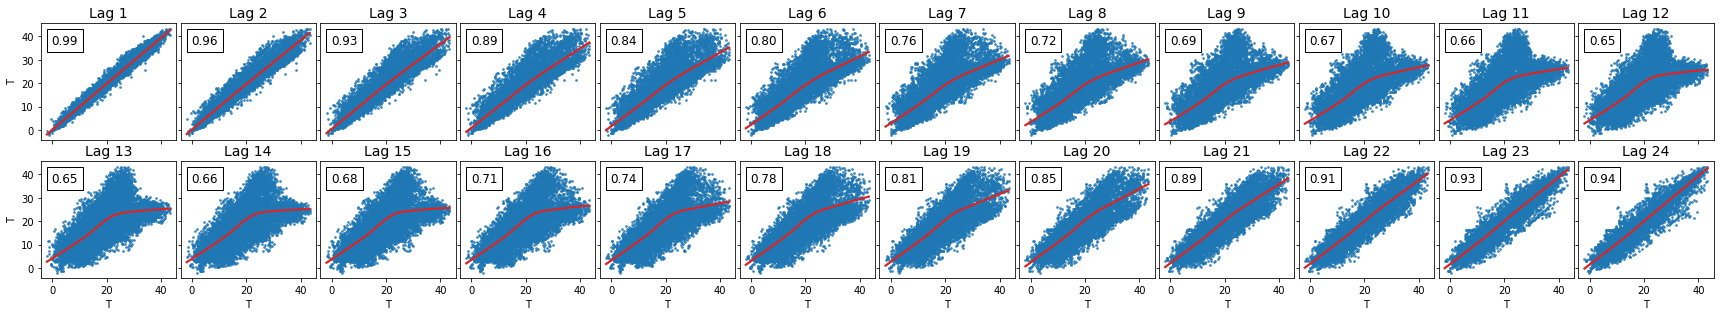

In [ ]:
_ = plot_lags(df['T'], lags=24, nrows=2)

# Autoregresive Model - Naive Base Model

In [147]:
from statsmodels.tsa.ar_model import AutoReg

In [148]:
train, test = train_test_split(df['T'], test_size=0.25, shuffle=False, random_state=0)

In [149]:
train.shape, test.shape

((7017,), (2340,))

In [150]:
# train AR model
ar_model = AutoReg(train, lags=24)
ar_model = ar_model.fit()
print("Coefficients: ", ar_model.params)

Coefficients:  intercept    0.095194
T.L1         1.201740
T.L2        -0.223872
T.L3        -0.057727
T.L4        -0.042917
T.L5         0.054256
T.L6        -0.041437
T.L7        -0.010897
T.L8        -0.018042
T.L9         0.004695
T.L10        0.006525
T.L11        0.027154
T.L12        0.011006
T.L13       -0.002388
T.L14       -0.048663
T.L15        0.008469
T.L16       -0.004123
T.L17        0.024434
T.L18        0.025027
T.L19        0.006767
T.L20       -0.049558
T.L21        0.040247
T.L22        0.089587
T.L23        0.133449
T.L24       -0.138226
dtype: float64


In [152]:
# make predictions
ar_predictions = ar_model.predict(start=test.index[0], end=test.index[-1], dynamic=False)
# new_df = pd.DataFrame(test, ar_predictions)
# new_df = new_df.reset_index()
# new_df.columns = ['Actual', 'Predicted']
# display(new_df)

In [153]:
def mean_absolute_percentage_error(actual, predicted):
  mape = np.sum(np.abs((actual-predicted)/actual)) * 1/len(actual) * 100
  return mape 

In [154]:
def over_under_forecast(actual, predicted):
    over_forecast = 0
    under_forecast = 0
    exact_forecast = 0
    for i in range(len(actual)):
        if actual[i] > predicted[i]:
            under_forecast+=1
        elif actual[i] < predicted[i]:
            over_forecast += 1
        else:
              exact_forecast+=1
    return (over_forecast, under_forecast, exact_forecast)

In [155]:
type(ar_predictions)

pandas.core.series.Series

In [ ]:
# model evaluation on test set
mae = mean_absolute_error(test, ar_predictions)
mape = mean_absolute_percentage_error(test, ar_predictions)
over_forecast, under_forecast, exact_forecast = over_under_forecast(test, ar_predictions)
print('Test MAE: %.3f' %mae)
print('Test mean absolute percentage error MAPE: %.3f%%' %mape)

print('Over forecast: {}, Under forecast: {}, Exact forecast: {}'.format(over_forecast, under_forecast, exact_forecast))

Test MAE: 9.200
Test mean absolute percentage error MAPE: 293.546%
Over forecast: 2212, Under forecast: 128, Exact forecast: 0


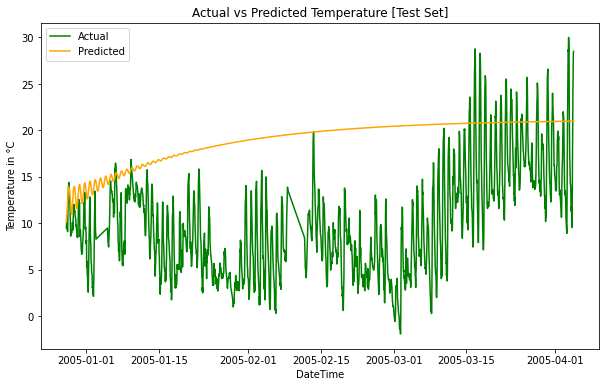

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df.index[len(train):], test, color='green')
plt.plot(df.index[len(train):], ar_predictions, color='orange')
plt.ylabel('Temperature in °C')
plt.xlabel('DateTime')
plt.title('Actual vs Predicted Temperature [Test Set]')
plt.legend(['Actual', 'Predicted'])
plt.show()

In [ ]:
# model evaluation on train set
ar_train_predictions = ar_model.predict(start=24, end=len(train)-1, dynamic=False)

train_mae = mean_absolute_error(train[24:], ar_train_predictions)
train_mape = mean_absolute_percentage_error(train[24:], ar_train_predictions)
print('Train MAE: %.3f' %train_mae)
print('Train mean absolute percentage error MAPE: %.3f%%' %np.sqrt(train_mape))

Train MAE: 0.743
Train mean absolute percentage error MAPE: 2.036%


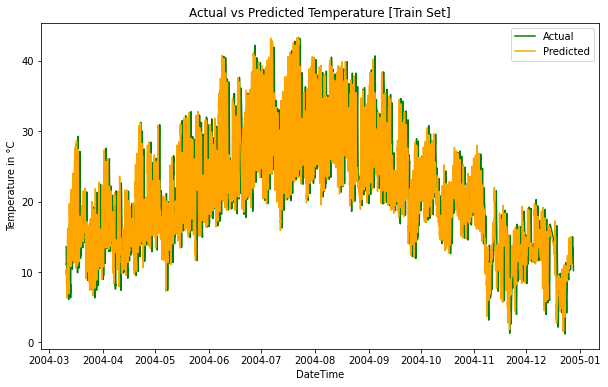

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df.index[:len(train)], train, color='green')
plt.plot(df.index[:len(ar_train_predictions)], ar_train_predictions, color='orange')
plt.ylabel('Temperature in °C')
plt.xlabel('DateTime')
plt.title('Actual vs Predicted Temperature [Train Set]')
plt.legend(['Actual', 'Predicted'])
plt.show()

# ARIMA - Univariate Forecasting

## ARIMA(1,1,1)

In [ ]:
import statsmodels.api as sm
# from statsmodels.tsa.arima_model import ARIMA as ARIMAA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

In [ ]:
train.shape, test.shape

((7017,), (2340,))

In [ ]:
# Fit the ARIMA model with order of p and q as 1 and differencing factor as 1
arima1 = ARIMA(train, order=(1,1,1))
arima1 = arima1.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


In [ ]:
# Generate the forecast
# arima_forecasted = arima1.forecast(steps=len(test))
arima_forecasted = arima1.predict(start=test.index[0], end=test.index[-1], dynamic=False)

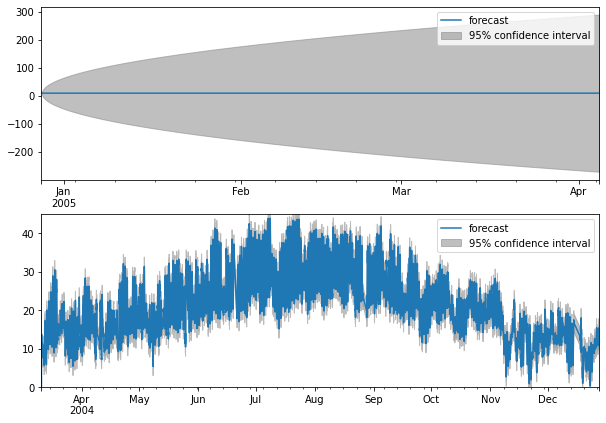

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,7))
plt.ylim(0, 45);
plot_predict(arima1, start=train.shape[0], end=train.shape[0]+test.shape[0]-1, dynamic=False, ax=ax1);
plot_predict(arima1, start=0, end=train.shape[0], dynamic=False, ax=ax2);

In [ ]:
# evaluate the model performance on test set
mae = mean_absolute_error(test, arima_forecasted)
mape = mean_absolute_percentage_error(test, arima_forecasted)
print('Test MAE: %.3f' %mae)
print('Test mean absolute percentage error MAPE: %.3f%%' %mape)

Test MAE: 4.345
Test mean absolute percentage error MAPE: 115.568%


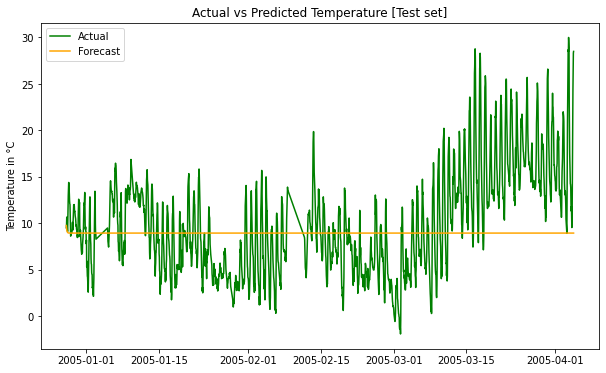

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(test, color='green')
plt.plot(arima_forecasted, color='orange')
plt.ylabel('Temperature in °C')
plt.title('Actual vs Predicted Temperature [Test set]')
plt.legend(['Actual', 'Forecast'])
plt.show()

In [ ]:
# evaluate the model performance on train set
arima_train_forecast = arima1.predict(start=train.index[0], end=train.index[-1], dynamic=False)
mae = mean_absolute_error(train, arima_train_forecast)
mape = mean_absolute_percentage_error(train, arima_train_forecast)
print('Train MAE: %.3f' %mae)
print('Train mean absolute percentage error MAPE: %.3f%%' %mape)

Train MAE: 0.863
Train mean absolute percentage error MAPE: 4.593%


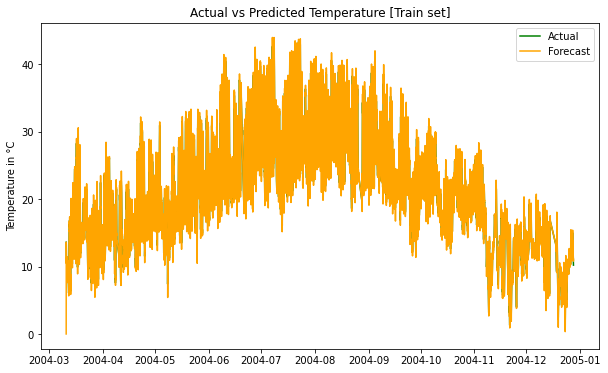

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(train, color='green')
plt.plot(arima_train_forecast, color='orange')
plt.ylabel('Temperature in °C')
plt.title('Actual vs Predicted Temperature [Train set]')
plt.legend(['Actual', 'Forecast'])
plt.show()

## ARIMA(2,1,2)


In [ ]:
!pip3 install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pmdarima.arima import auto_arima

In [151]:

# Use auto_arima to find the optimal parameters

# stepwise_arima = auto_arima(df['T'], start_p=1, start_q=1,
#                    max_p=3, max_q=3, m=24,
#                    start_P=0, seasonal=True,
#                    trace=True,
#                    error_action='ignore',  # don't want to know if an order does not work
#                    suppress_warnings=True,  # don't want convergence warnings
#                    stepwise=True)  # set to stepwise



stepwise_arima = auto_arima(df['T'])
           

# stepwise_arima = auto_arima(df['T'])
# print(stepwise_arima.summary())


In [ ]:
stepwise_arima

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
# Fit the ARIMA model with order of p and q as 1 and differencing factor as 1
arima2 = ARIMA(train, order=(2, 1, 2))
arima2 = arima2.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


In [ ]:
# Generate the forecast
# arima_forecast2 = arima2.forecast(steps=len(test))
arima_forecast2 = arima2.predict(start=test.index[0], end=test.index[-1], dynamic=False)

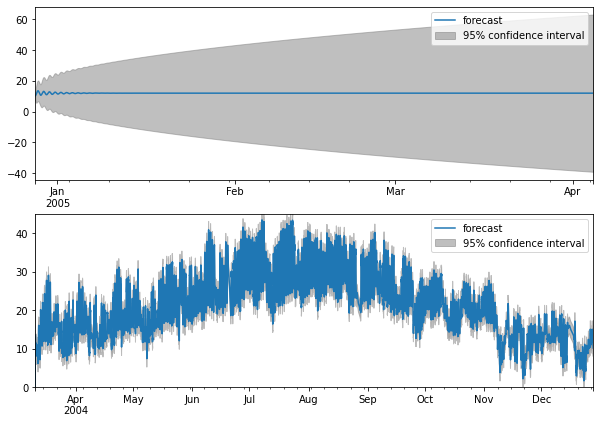

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,7))
plt.ylim(0, 45);
plot_predict(arima2, start=train.shape[0], end=train.shape[0]+test.shape[0]-1, dynamic=False, ax=ax1);
plot_predict(arima2, start=0, end=train.shape[0], dynamic=False, ax=ax2);

In [ ]:
# evaluate the model performance on test set
mae = mean_absolute_error(test, arima_forecast2)
mape = mean_absolute_percentage_error(test, arima_forecast2)
print('Test MAE: %.3f' %mae)
print('Test mean absolute percentage error MAPE: %.3f%%' %mape)

Test MAE: 4.751
Test mean absolute percentage error MAPE: 157.930%


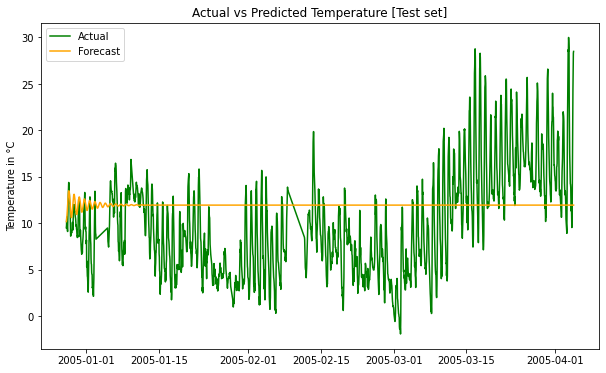

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(test, color='green')
plt.plot(arima_forecast2, color='orange')
plt.ylabel('Temperature in °C')
plt.title('Actual vs Predicted Temperature [Test set]')
plt.legend(['Actual', 'Forecast'])
plt.show()

In [ ]:
# evaluate the model performance on train set
arima_train_forecast2 = arima2.predict(start=train.index[0], end=train.index[-1], dynamic=False)
mae = mean_absolute_error(train, arima_train_forecast2)
mape = mean_absolute_percentage_error(train, arima_train_forecast2)
print('Train MAE: %.3f' %mae)
print('Train mean absolute percentage error MAPE: %.3f%%' %mape)

Train MAE: 0.810
Train mean absolute percentage error MAPE: 4.464%


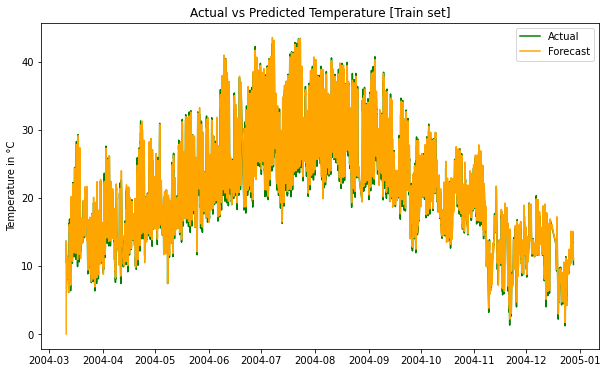

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(train, color='green')
plt.plot(arima_train_forecast2, color='orange')
plt.ylabel('Temperature in °C')
plt.title('Actual vs Predicted Temperature [Train set]')
plt.legend(['Actual', 'Forecast'])
plt.show()

# SARIMA - Univariate Forecasting


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
sarima = SARIMAX(train, order=(1,1,1),seasonal_order=(1,1,1,24))
sarima = sarima.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


In [ ]:
sarima_forecast = sarima.forecast(steps=len(test))

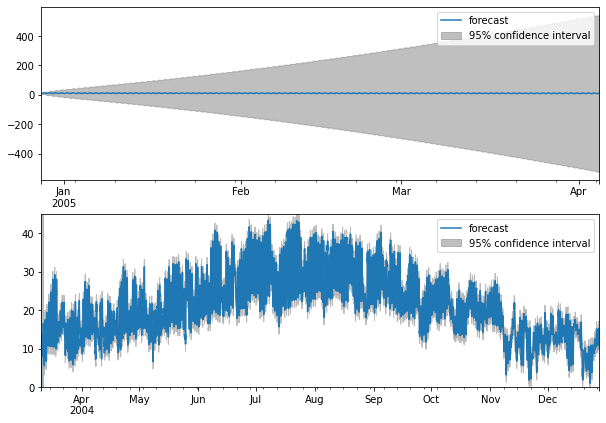

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,7))
plt.ylim(0, 45);
plot_predict(sarima, start=train.shape[0], end=train.shape[0]+test.shape[0]-1, dynamic=False, ax=ax1);
plot_predict(sarima, start=0, end=train.shape[0], dynamic=False, ax=ax2);

In [ ]:
# evaluate the model performance on test set
mae = mean_absolute_error(test, sarima_forecast)
mape = mean_absolute_percentage_error(test, sarima_forecast)
print('Test MAE: %.3f' %mae)
print('Test mean absolute percentage error MAPE: %.3f%%' %mape)

Test MAE: 4.222
Test mean absolute percentage error MAPE: 122.139%


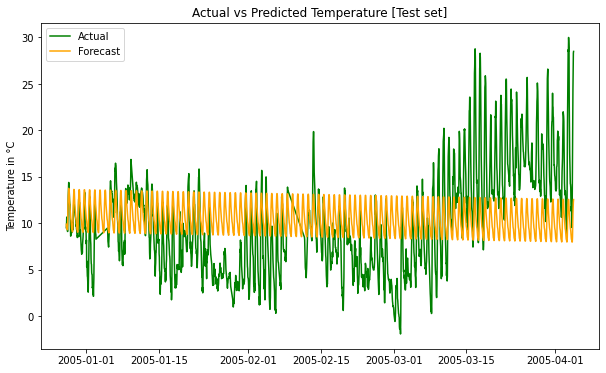

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df.index[len(train):], test, color='green')
plt.plot(df.index[len(train):], sarima_forecast, color='orange')
plt.ylabel('Temperature in °C')
plt.title('Actual vs Predicted Temperature [Test set]')
plt.legend(['Actual', 'Forecast'])
plt.show()

In [ ]:
# evaluate the model performance on train set
sarima_train_forecast = sarima.predict(start=train.index[0], end=train.index[-1], dynamic=False)
mae = mean_absolute_error(train, sarima_train_forecast)
mape = mean_absolute_percentage_error(train, sarima_train_forecast)
print('Train MAE: %.3f' %mae)
print('Train mean absolute percentage error MAPE: %.3f%%' %mape)

Train MAE: 0.709
Train mean absolute percentage error MAPE: 3.974%


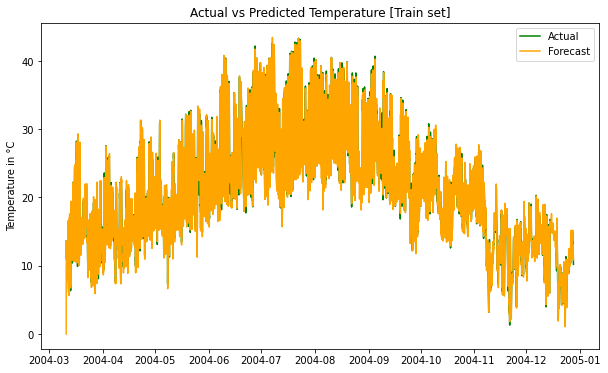

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df.index[:len(train)], train, color='green')
plt.plot(df.index[:len(train)], sarima_train_forecast, color='orange')
plt.ylabel('Temperature in °C')
plt.title('Actual vs Predicted Temperature [Train set]')
plt.legend(['Actual', 'Forecast'])
plt.show()

### ARMA ARIMA SARMA Performance

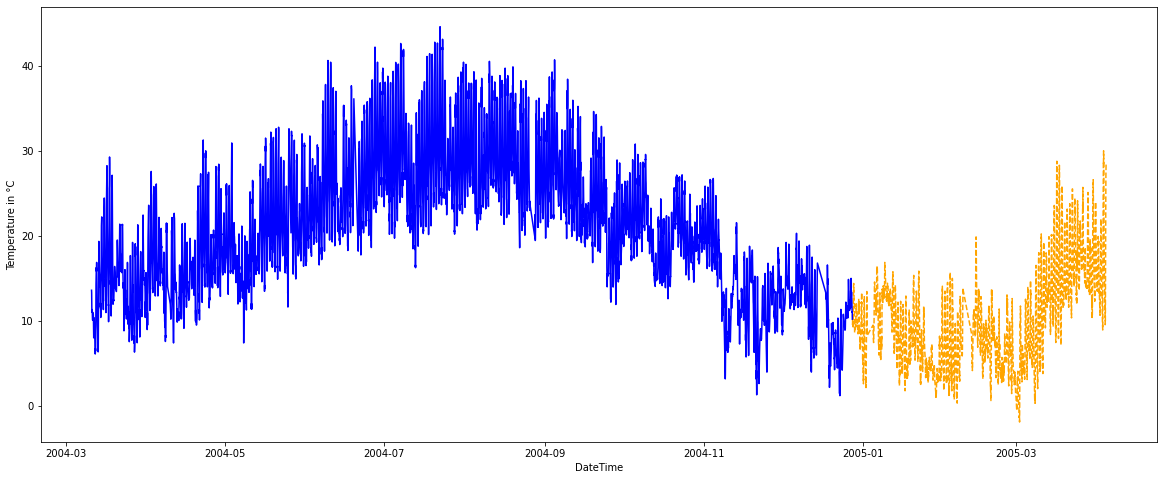

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df.index[len(train):], test, linestyle='dashed', color='orange')
plt.plot(df.index[:len(train)], train,  color='b')
# plt.plot(df.index[len(train):], ar_predictions, color='m')
# plt.plot(df.index[len(train):], arima_forecasted, color='r')
# plt.plot(df.index[len(train):], arima_forecast2, color='k')
# plt.plot(df.index[len(train):], sarima_forecast, color='y')
plt.xlabel('DateTime')
plt.ylabel('Temperature in °C')
# plt.title('Actual vs Predicted Temperature on Test set')
# plt.legend(['Actual Temperature Series', 'AR(24) Prediction', 'ARIMA(1,1,1) Prediction', 'ARIMA(2,1,2) Prediction', 'SARIMA(1,1,1)(1,1,1,24) Prediction'])
plt.show()

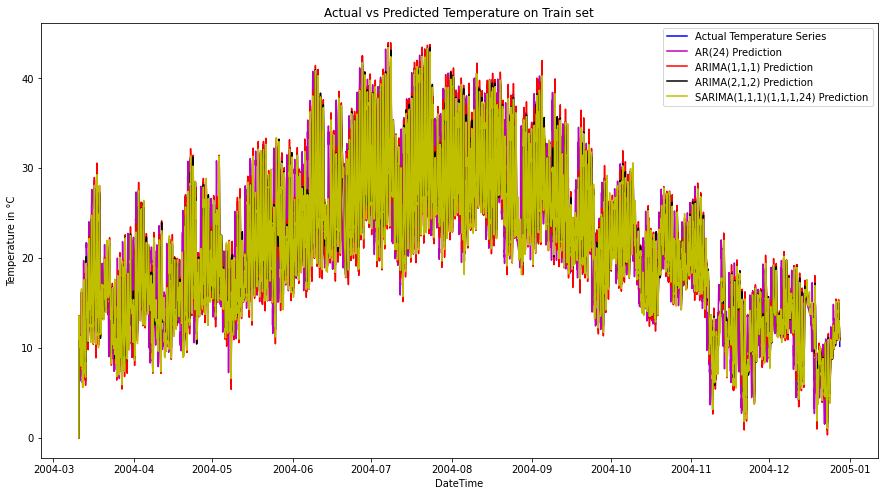

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(df.index[:len(train)], train, color='b')
plt.plot(df.index[:len(ar_train_predictions)], ar_train_predictions, color='m')
plt.plot(df.index[:len(train)], arima_train_forecast, color='r')
plt.plot(df.index[:len(train)], arima_train_forecast2, color='k')
plt.plot(df.index[:len(train)], sarima_train_forecast, color='y')
plt.xlabel('DateTime')
plt.ylabel('Temperature in °C')
plt.title(r'Actual vs Predicted Temperature on Train set')
plt.legend(['Actual Temperature Series', 'AR(24) Prediction', 'ARIMA(1,1,1) Prediction', 'ARIMA(2,1,2) Prediction', 'SARIMA(1,1,1)(1,1,1,24) Prediction'])
plt.show()


# TBDS

In [ ]:
! pip install tbats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 2.7 MB/s eta 0:00:00


In [ ]:
from tbats import TBATS

In [ ]:
estimator = TBATS(seasonal_periods=(24, 168, 720), use_arma_errors=False, use_box_cox=False)
tbats = estimator.fit(train)

In [ ]:
tbats.summary()

'Use Box-Cox: False\nUse trend: True\nUse damped trend: True\nSeasonal periods: [ 24. 168. 720.]\nSeasonal harmonics [5 1 1]\nARMA errors (p, q): (0, 0)\nSmoothing (Alpha): 1.228845\nTrend (Beta): -0.088574\nDamping Parameter (Phi): 0.904443\nSeasonal Parameters (Gamma): [-2.82246728e-07 -2.93614503e-07  8.61002368e-07  2.32412229e-06\n  3.10229529e-07 -1.53331159e-06]\nAR coefficients []\nMA coefficients []\nSeed vector [11.69328152  0.78938635  3.54503402 -0.78694895  0.32312681  0.1166796\n -0.12195698 -3.02597595 -0.85458916  0.13190726 -0.31055276 -0.08760084\n  0.38105878  0.47068386  3.67224543  2.82213516]\n\nAIC 62496.365304'

In [ ]:
tbats_predicted = tbats.forecast(len(test))

In [ ]:
# evaluate the model performance on test set
mae = mean_absolute_error(test, tbats_predicted)
mape = mean_absolute_percentage_error(test, tbats_predicted)
print('Test MAE: %.3f' %mae)
print('Test mean absolute percentage error MAPE: %.3f%%' %mape)
over_forecast, under_forecast, exact_forecast = over_under_forecast(test, tbats_predicted)
print('Over forecast: {}, Under forecast: {}, Exact forecast: {}'.format(over_forecast, under_forecast, exact_forecast))

Test MAE: 7.296
Test mean absolute percentage error MAPE: 199.787%
Over forecast: 1957, Under forecast: 383, Exact forecast: 0


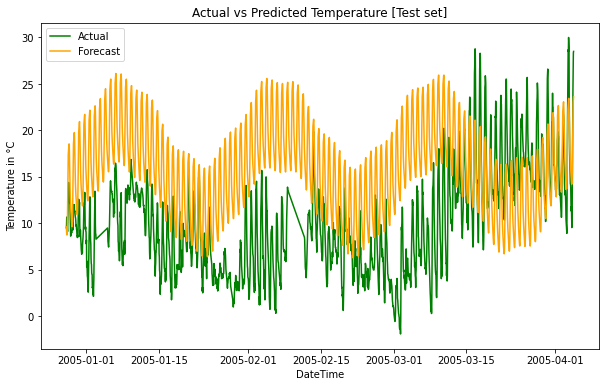

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df.index[len(train):], test, color='green')
plt.plot(df.index[len(train):], tbats_predicted, color='orange')
plt.ylabel('Temperature in °C')
plt.xlabel('DateTime')
plt.title('Actual vs Predicted Temperature [Test set]')
plt.legend(['Actual', 'Forecast'])
plt.show()

In [ ]:
# evaluate the model performance on train set
mae = mean_absolute_error(train, tbats.forecast(len(train)))
mape = mean_absolute_percentage_error(train, tbats.forecast(len(train)))
print('Train MAE: %.3f' %mae)
print('Train mean absolute percentage error MAPE: %.3f%%' %mape)

Train MAE: 9.006
Train mean absolute percentage error MAPE: 48.139%


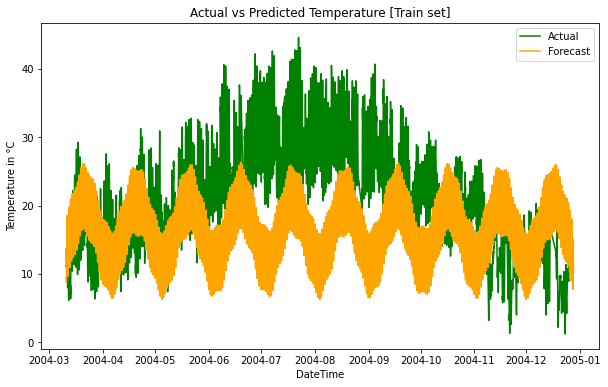

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df.index[:len(train)], train, color='green')
plt.plot(df.index[:len(train)], tbats.forecast(len(train)), color='orange')
plt.ylabel('Temperature in °C')
plt.xlabel('DateTime')
plt.title('Actual vs Predicted Temperature [Train set]')
plt.legend(['Actual', 'Forecast'])
plt.show()

# Linear Regression

In [ ]:
temp = pd.concat([df['T'].shift(24), df['T']], axis=1)
temp.columns = ['Temp lag 24', 'Temperature']
temp.head(25)

,Temp lag 24,Temperature
DateTime,,
2004-03-10 18:00:00,NaN,13.600
2004-03-10 19:00:00,NaN,13.300
2004-03-10 20:00:00,NaN,11.900
2004-03-10 21:00:00,NaN,11.000
2004-03-10 22:00:00,NaN,11.150
2004-03-10 23:00:00,NaN,11.175
2004-03-11 00:00:00,NaN,11.325
2004-03-11 01:00:00,NaN,10.675
2004-03-11 02:00:00,NaN,10.650


In [ ]:
temp.dropna(axis=0, inplace=True)

In [ ]:
X = temp['Tem 24']
y = temp['Temperature']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25, shuffle=False)

In [ ]:
reg = LinearRegression()
reg.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression()

In [ ]:
predicted=reg.predict(X_test.values.reshape(-1,1))

In [ ]:
# evaluate the model performance on test set
mae = mean_absolute_error(y_test, predicted)
mape = mean_absolute_percentage_error(y_test, predicted)
print('Test MAE: %.3f' %mae)
print('Test mean absolute percentage error MAPE: %.3f%%' %mape)
over_forecast, under_forecast, exact_forecast = over_under_forecast(y_test, predicted)
print('Over forecast: {}, Under forecast: {}, Exact forecast: {}'.format(over_forecast, under_forecast, exact_forecast))

Test MAE: 2.232
Test mean absolute percentage error MAPE: 57.286%
Over forecast: 1533, Under forecast: 801, Exact forecast: 0


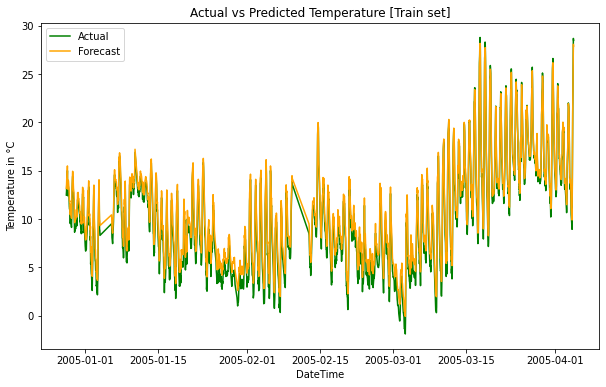

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(X_test, color='green')
plt.plot(X_test.index, predicted, color='orange')
plt.ylabel('Temperature in °C')
plt.xlabel('DateTime')
plt.title('Actual vs Predicted Temperature [Train set]')
plt.legend(['Actual', 'Forecast'])
plt.show()

In [ ]:
# model evaluation on train set
train_pred = reg.predict(X_train.values.reshape(-1,1))
train_mae = mean_absolute_error(y_train, train_pred)
train_mape = mean_absolute_percentage_error(y_train, train_pred)
print('\nMAE on train set: %.3f' %train_mae)
print('MAPE on train set: %.3f%%' %train_mape)


MAE on train set: 2.240
MAPE on train set: 14.001%


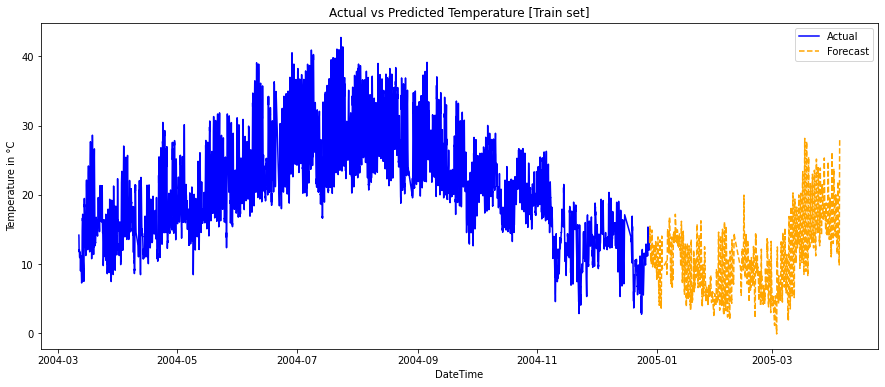

In [ ]:
plt.figure(figsize=(15,6))

plt.plot(X_train.index, train_pred, color='b')
plt.plot(X_test.index, predicted, linestyle='dashed', color='orange')
plt.ylabel('Temperature in °C')
plt.xlabel('DateTime')
plt.title('Actual vs Predicted Temperature [Train set]')
plt.legend(['Actual', 'Forecast'])
plt.show()

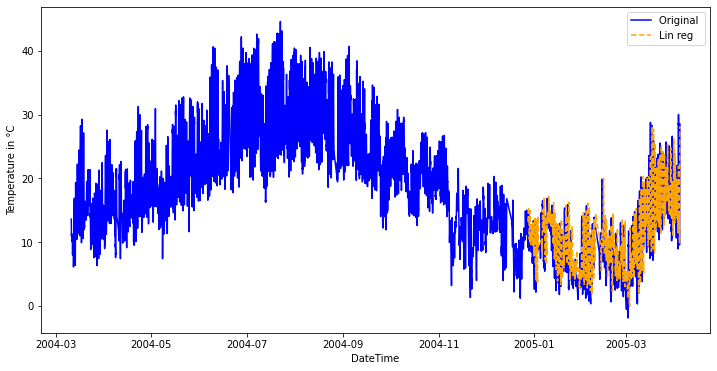

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(df.index, df['T'],  color='b')
plt.plot(X_test.index, predicted, linestyle='dashed', color='orange')
plt.ylabel('Temperature in °C')
plt.xlabel('DateTime')
plt.legend(['Original ', 'Lin reg'])
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(y_train, color='green')
plt.plot(X_train.index, train_pred, color='orange')
plt.ylabel('Temperature in °C')
plt.xlabel('DateTime')
plt.title('Actual vs Predicted Temperature [Train set]')
plt.legend(['Actual', 'Forecast'])
plt.show()

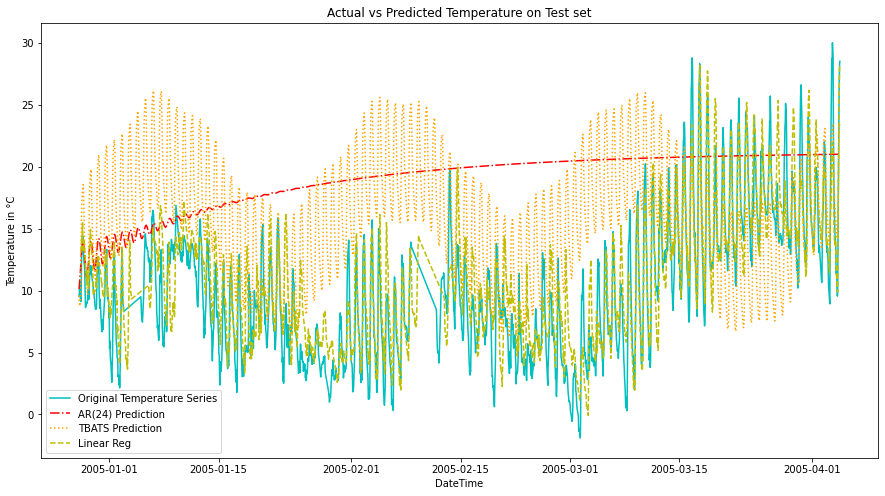

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(df.index[len(train):], test, color='c')
plt.plot(df.index[len(train):], ar_predictions, linestyle='dashdot',color='r')
plt.plot(df.index[len(train):], tbats_predicted, linestyle='dotted', color='orange')
plt.plot(X_test.index, predicted, linestyle='dashed', color='y')
plt.xlabel('DateTime')
plt.ylabel('Temperature in °C')
plt.title('Actual vs Predicted Temperature on Test set')
plt.legend(['Original Temperature Series', 'AR(24) Prediction', 'TBATS Prediction', 'Linear Reg'])
plt.show()

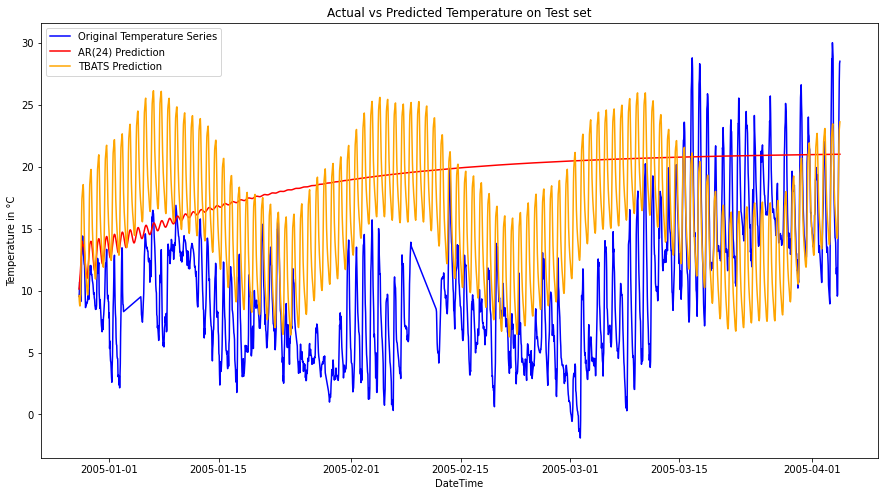

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(df.index[len(train):], test, color='b')
plt.plot(df.index[len(train):], ar_predictions, color='r')
plt.plot(df.index[len(train):], tbats_predicted, color='orange')
# plt.plot(X_test.index, predicted, color='m')
plt.xlabel('DateTime')
plt.ylabel('Temperature in °C')
plt.title('Actual vs Predicted Temperature on Test set')
plt.legend(['Original Temperature Series', 'AR(24) Prediction', 'TBATS Prediction'])
plt.show()


> Indented block



# Bivariate Forecastnig - Linear Regression with Absolute Humidity

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [ ]:
X = df['T']
y = df['AH']

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False, random_state=0)

In [ ]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train.values.reshape(-1, 1))
X_test_sc = scaler.transform(X_test.values.reshape(-1, 1))

In [ ]:
lr = LinearRegression()
lr.fit(X_train_sc, y_train)

In [ ]:
# model evaluation on test set
y_pred = lr.predict(X_test_sc)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print('MAE on test set: %.3f' %mae)
print('MAPE on test set: %.3f%%' %mape)

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(y_test.index, y_test, color='green')
plt.plot(y_test.index, y_pred, color='orange')
plt.ylabel('CO(GT)')
plt.title('Actual vs Predicted Temperature [Test set]')
plt.legend(['Actual', 'Predicted'])
plt.show()

In [ ]:
# model evaluation on train set
train_pred = lr.predict(X_train_sc)
train_mae = mean_absolute_error(y_train, train_pred)
train_mape = mean_absolute_percentage_error(y_train, train_pred)
print('\nMAE on train set: %.3f' %train_mae)
print('MAPE on train set: %.3f%%' %train_mape)

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(y_train.index, y_train, color='green')
plt.plot(y_train.index, train_pred, color='orange')
plt.ylabel('CO(GT)')
plt.title('Actual vs Predicted Temperature [Test set]')
plt.legend(['Actual', 'Predicted'])
plt.show()